In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = pd.read_csv("wine-clustering.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['clusters'] = kmeans.fit_predict(data)

In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['Principal Component Analysis 1','Principal Component Analysis 2'])

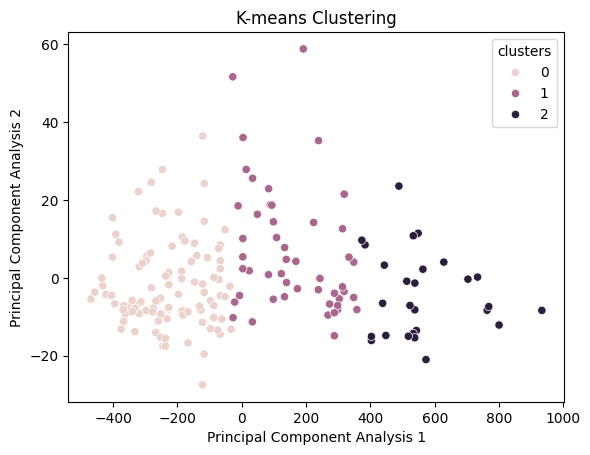

In [7]:
sns.scatterplot(x="Principal Component Analysis 1", y="Principal Component Analysis 2", hue=data['clusters'], data=results)
plt.title('K-means Clustering')
plt.show()

In [8]:
input = "14.13,4.1,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.6,560"
input_array = np.array(input.split(','), dtype=np.float64)
input_array = input_array.reshape(1, -1)  # Reshape to match model input
cluster = kmeans.predict(input_array)
print(cluster[0])

0


/home/jyty/Code/clustering/.venv/lib64/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [9]:
centroids = kmeans.cluster_centers_

In [10]:
cluster_0_data = data[data['clusters'] == 0]
cluster_1_data = data[data['clusters'] == 1]
cluster_2_data = data[data['clusters'] == 2]

# Describe attributes for each cluster
cluster_0_description = cluster_0_data.describe()
cluster_1_description = cluster_1_data.describe()
cluster_2_description = cluster_2_data.describe()

In [11]:
cluster_0_description

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,12.598529,2.453431,2.321863,20.646078,93.696078,2.053627,1.647549,0.395980,1.425098,4.673333,0.917843,2.394804,521.558824,0.0
std,0.699304,1.196362,0.293165,2.907780,11.185023,0.541146,0.862433,0.127305,0.551624,2.652829,0.251083,0.685058,114.443170,0.0
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.140000,0.410000,1.280000,0.480000,1.290000,278.000000,0.0
25%,12.080000,1.480000,2.190000,18.575000,86.000000,1.635000,0.920000,0.290000,1.030000,2.700000,0.732500,1.750000,429.500000,0.0
50%,12.515000,2.125000,2.305000,20.600000,90.000000,2.000000,1.595000,0.400000,1.390000,3.800000,0.895000,2.430000,517.500000,0.0
75%,13.045000,3.292500,2.500000,22.500000,99.750000,2.442500,2.200000,0.495000,1.747500,5.670000,1.077500,3.015000,625.000000,0.0
max,14.340000,5.800000,3.230000,28.500000,134.000000,3.520000,5.080000,0.660000,3.580000,13.000000,1.710000,3.690000,714.000000,0.0
